In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

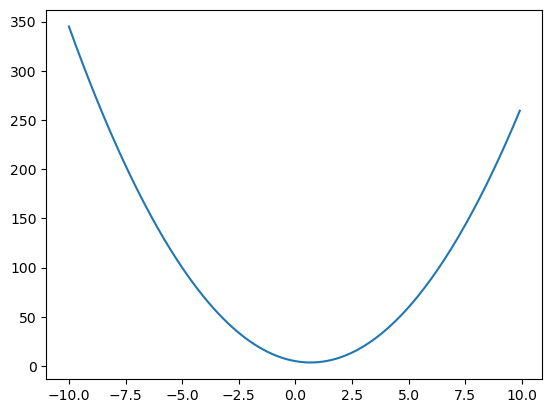

In [4]:
x = np.arange(-10,10,0.1)
y = f(x)

plt.plot(x,y)

In [5]:
h = 0.001
x = 3

f(x+h)

f(x+h) - f(x)

(f(x+h) - f(x))/h

14.00300000000243

In [6]:
h = 0.001
x = -3
(f(x+h) - f(x))/h

-21.996999999998934

In [7]:
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [8]:
a = 2.0
b = -3.0
c = 10
d = a*b + c
print(d)

4.0


In [9]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)




d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [10]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
b += h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
c += h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [26]:
class Value:
    def __init__(self, data,_children=(), _op='',label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
# for printing out nice looking data, not python objects
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other), "+")
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out

    
a = Value(2.0, label="a")
b = Value(-3.0, label ="b")
c = Value(10.0, label = "c")
e = a*b; e.label="e"

print("a + b" , a + b)
print("a * b" , a * b)


d = e + c



a + b Value(data=-1.0)
a * b Value(data=-6.0)


In [13]:
# we need the connective tissue

In [14]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [32]:
#from graphviz import Digraph
from graphviz import *

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [33]:
draw_dot(d)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
draw_dot()

In [29]:
import graphviz

In [31]:
dot = graphviz.Digraph(comment='The Round Table')
dot  #doctest: +ELLIPSIS

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH